In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from math import sin, pi

seq_len = 200

In [2]:
df = pd.read_csv('./s&p500_3years.csv', delimiter=',')
# Convert str to datetime in column "date"
df["date"] = pd.Series([datetime.strptime(x[:-6], "%Y-%m-%d %H:%M:%S") for x in df["date"]])

In [3]:
df["day_of_week"] = df["date"].apply(lambda x: sin(2*pi * x.weekday() / 7))
# df['day_of_year'] = df['date'].apply(lambda x: sin(2*pi * x.timetuple().tm_yday / 365))
df['time_of_day'] = df['date'].apply(lambda x: sin(2*pi*((x.time().hour - 7) * 60 + x.time().minute) / (15*60)))
df

,date,open,high,low,close,volume,is_ext,day_of_week,time_of_day
0,2018-04-02 13:00:00,190,190,188,189,9892,False,0.000000,5.877853e-01
1,2018-04-02 14:00:00,188,188,186,186,34335,False,0.000000,2.079117e-01
2,2018-04-02 15:00:00,186,186,184,185,35470,True,0.000000,-2.079117e-01
3,2018-04-02 16:00:00,185,187,184,185,25025,False,0.000000,-5.877853e-01
4,2018-04-02 17:00:00,185,186,184,184,23102,True,0.000000,-8.660254e-01
...,...,...,...,...,...,...,...,...,...
10946,2022-01-28 18:00:00,397,400,397,399,17133,False,-0.433884,-9.945219e-01
10947,2022-01-28 19:00:00,400,401,396,401,24383,False,-0.433884,-9.510565e-01
10948,2022-01-28 20:00:00,401,406,401,406,68026,False,-0.433884,-7.431448e-01
10949,2022-01-28 21:00:00,406,409,400,407,404,False,-0.433884,-4.067366e-01


In [27]:
df.to_csv("./av_data.csv")

In [4]:
'''Normalize price columns'''

df['open'] = (df['open']-np.mean(df['open']))/np.std(df['open'])
df['high'] = (df['high']-np.mean(df['high']))/np.std(df['high'])
df['low'] = (df['low']-np.mean(df['low']))/np.std(df['low']) 
df['close'] = (df['close']-np.mean(df['close']))/np.std(df['close'])
df['volume'] = (df['volume']-np.mean(df['volume']))/np.std(df['volume'])

df.head()

,date,open,high,low,close,volume,is_ext,day_of_week,time_of_day
0,2018-04-02 13:00:00,-1.507780,-1.515642,-1.522882,-1.519477,-0.342147,False,0.0,0.587785
1,2018-04-02 14:00:00,-1.531133,-1.538941,-1.546295,-1.554513,0.777023,False,0.0,0.207912
2,2018-04-02 15:00:00,-1.554485,-1.562241,-1.569708,-1.566192,0.828991,True,0.0,-0.207912
3,2018-04-02 16:00:00,-1.566162,-1.550591,-1.569708,-1.566192,0.350747,False,0.0,-0.587785
4,2018-04-02 17:00:00,-1.566162,-1.562241,-1.569708,-1.577870,0.262698,True,0.0,-0.866025


In [5]:
times = df.index.values
last_10pct = df.index.values[-int(0.1*len(times))] # Last 10% of series
last_20pct = df.index.values[-int(0.2*len(times))] # Last 20% of series
print(df.head())
df.columns

                 date      open      high       low     close    volume  \
0 2018-04-02 13:00:00 -1.507780 -1.515642 -1.522882 -1.519477 -0.342147   
1 2018-04-02 14:00:00 -1.531133 -1.538941 -1.546295 -1.554513  0.777023   
2 2018-04-02 15:00:00 -1.554485 -1.562241 -1.569708 -1.566192  0.828991   
3 2018-04-02 16:00:00 -1.566162 -1.550591 -1.569708 -1.566192  0.350747   
4 2018-04-02 17:00:00 -1.566162 -1.562241 -1.569708 -1.577870  0.262698   

   is_ext  day_of_week  time_of_day  
0   False          0.0     0.587785  
1   False          0.0     0.207912  
2    True          0.0    -0.207912  
3   False          0.0    -0.587785  
4    True          0.0    -0.866025  


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'is_ext',
       'day_of_week', 'time_of_day'],
      dtype='object')

In [6]:
###############################################################################
'''Create training, validation and test split'''

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

# Remove date column
df_train.drop(columns=['date', "is_ext"], inplace=True)
df_val.drop(columns=['date', "is_ext"], inplace=True)
df_test.drop(columns=['date', "is_ext"], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

df_train.head()

Training data shape: (8761, 7)
Validation data shape: (1095, 7)
Test data shape: (1095, 7)


C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,open,high,low,close,volume,day_of_week,time_of_day
0,-1.507780,-1.515642,-1.522882,-1.519477,-0.342147,0.0,0.587785
1,-1.531133,-1.538941,-1.546295,-1.554513,0.777023,0.0,0.207912
2,-1.554485,-1.562241,-1.569708,-1.566192,0.828991,0.0,-0.207912
3,-1.566162,-1.550591,-1.569708,-1.566192,0.350747,0.0,-0.587785
4,-1.566162,-1.562241,-1.569708,-1.577870,0.262698,0.0,-0.866025


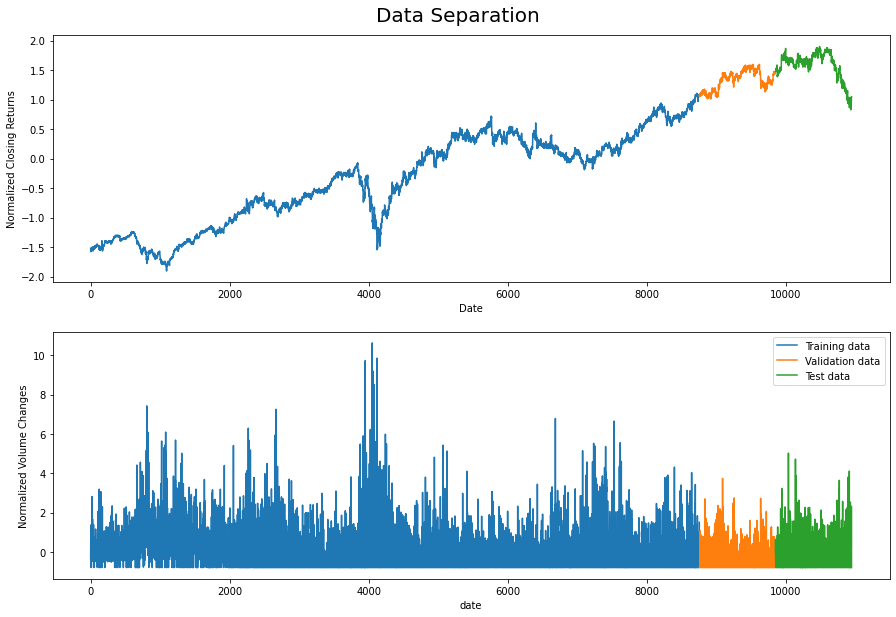

In [7]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.92)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['volume'], label='Test data')
ax2.set_xlabel('date')
ax2.set_ylabel('Normalized Volume Changes')

plt.legend(loc='best')
plt.show()

In [8]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(8561, 200, 7) (8561,)
(895, 200, 7) (895,)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))
import warnings
warnings.filterwarnings('ignore')

Tensorflow version: 2.8.0


In [10]:
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(64, input_shape=(seq_len, 7), return_sequences=True))
  model.add(tf.keras.layers.LSTM(64, return_sequences=True))
  model.add(tf.keras.layers.LSTM(32))
  model.add(tf.keras.layers.Dense(1))#, activation=tf.nn.relu))
  model.compile(optimizer="adam", loss="mean_squared_error")
  return model

### Train model

In [11]:
model = create_model()

model.summary()

model.fit(X_train, y_train,
              batch_size=1024,
              epochs=30,
              validation_data=(X_val, y_val),)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 64)           18432     
                                                                 
 lstm_1 (LSTM)               (None, 200, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 63,905
Trainable params: 63,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
9/9 [==============================] - 49s 5s/step - loss: 0.2643 - val_loss: 0.2336
Epoch 2/50
9/9 [==============================] - 50s 6s/step - loss: 0.0352 - val_loss:

In [13]:
# Get predictions
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

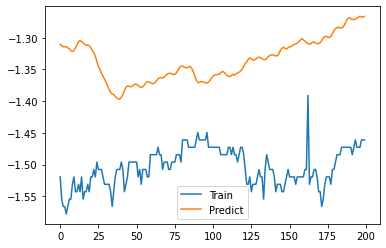

In [15]:
plt.plot(train_data[:seq_len, 3], label="Train")
plt.plot(train_pred[seq_len:seq_len*2], label="Predict")
plt.legend()
plt.show()

In [1]:
train_data[:int(2*(seq_len-8)), 3]

NameError: name 'train_data' is not defined

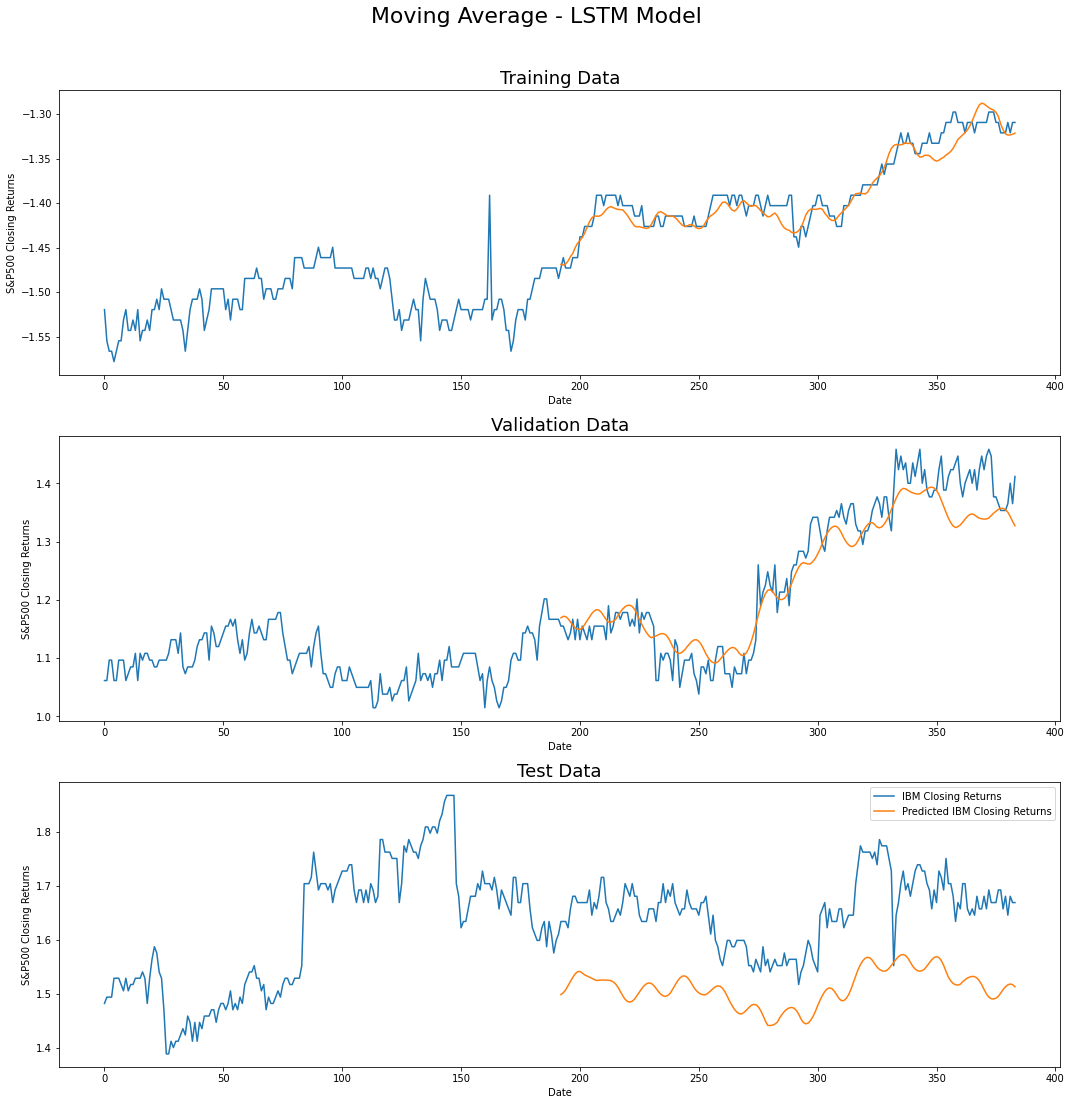

In [16]:
'''Display results'''

fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Moving Average - LSTM Model", fontsize=22)
st.set_y(1.02)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax11.plot(np.arange(seq_len-8, int(2*(seq_len-8))), train_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('S&P500 Closing Returns')

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len-8, int(2*(seq_len-8))),val_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('S&P500 Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len-8, int(2*(seq_len-8))),test_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('S&P500 Closing Returns')
 
plt.tight_layout()
plt.legend(loc='best')

In [40]:
model.fit(X_train, y_train,
              batch_size=1024,
              epochs=50,
              validation_data=(X_val, y_val),)   

Epoch 1/50
9/9 [==============================] - 8s 873ms/step - loss: 0.0017 - val_loss: 0.0265
Epoch 2/50
9/9 [==============================] - 8s 863ms/step - loss: 0.0016 - val_loss: 0.0276
Epoch 3/50
9/9 [==============================] - 8s 859ms/step - loss: 0.0016 - val_loss: 0.0236
Epoch 4/50
9/9 [==============================] - 8s 860ms/step - loss: 0.0017 - val_loss: 0.0276
Epoch 5/50
9/9 [==============================] - 8s 853ms/step - loss: 0.0016 - val_loss: 0.0266
Epoch 6/50
9/9 [==============================] - 8s 870ms/step - loss: 0.0017 - val_loss: 0.0299
Epoch 7/50
9/9 [==============================] - 8s 859ms/step - loss: 0.0017 - val_loss: 0.0242
Epoch 8/50
9/9 [==============================] - 8s 863ms/step - loss: 0.0016 - val_loss: 0.0207
Epoch 9/50
9/9 [==============================] - 8s 857ms/step - loss: 0.0016 - val_loss: 0.0252
Epoch 10/50
9/9 [==============================] - 8s 859ms/step - loss: 0.0016 - val_loss: 0.0228
Epoch 11/50
9/9 [==

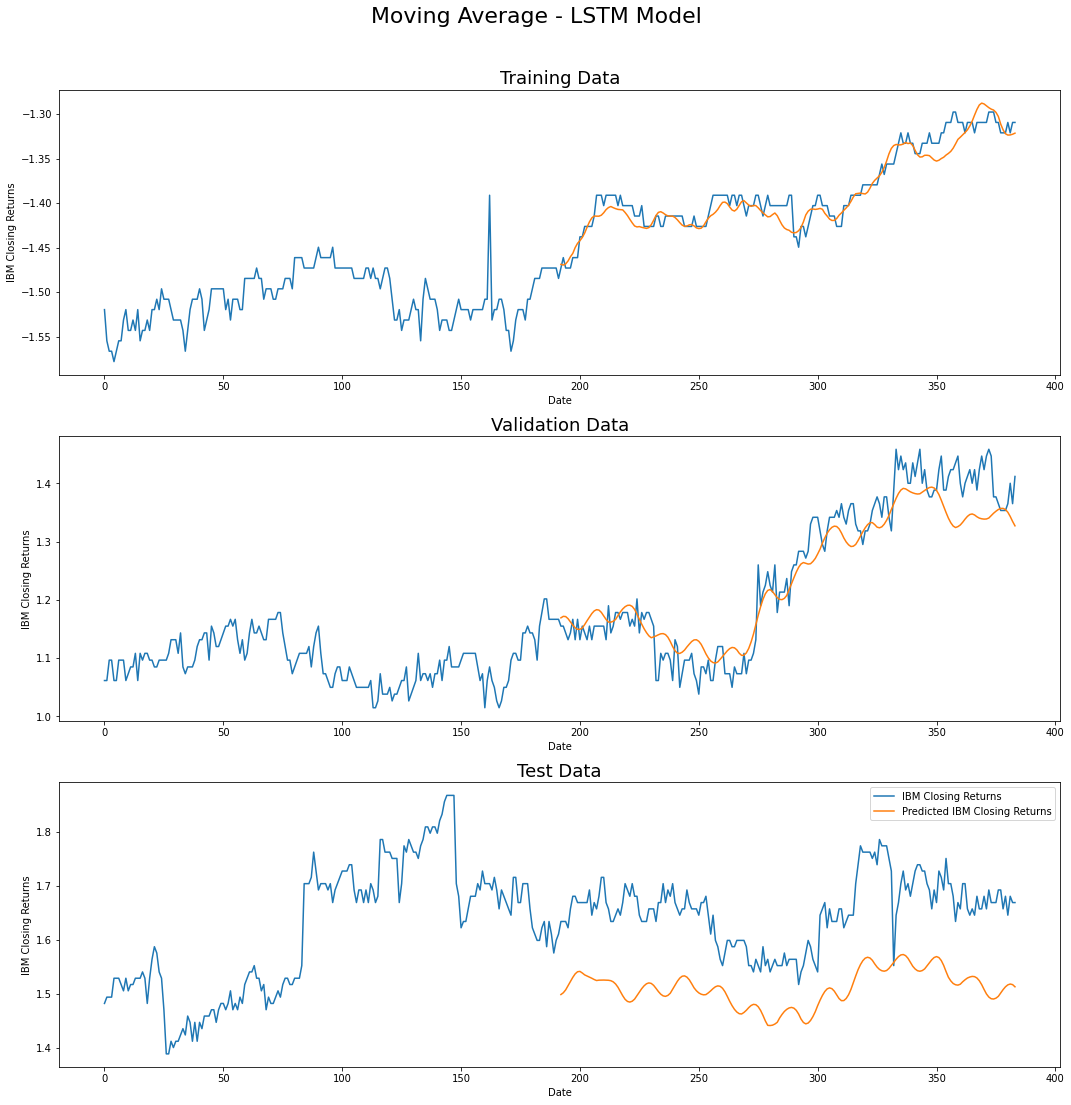

In [12]:
'''Display results'''

fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Moving Average - LSTM Model", fontsize=22)
st.set_y(1.02)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax11.plot(np.arange(seq_len-8, int(2*(seq_len-8))), train_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('IBM Closing Returns')

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len-8, int(2*(seq_len-8))),val_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('IBM Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len-8, int(2*(seq_len-8))),test_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('IBM Closing Returns')
 
plt.tight_layout()
plt.legend(loc='best')

In [42]:
model.fit(X_train, y_train,
              batch_size=1024,
              epochs=100,
              validation_data=(X_val, y_val),)  

Epoch 1/100
9/9 [==============================] - 8s 860ms/step - loss: 0.0012 - val_loss: 0.0169
Epoch 2/100
9/9 [==============================] - 8s 860ms/step - loss: 0.0012 - val_loss: 0.0141
Epoch 3/100
9/9 [==============================] - 8s 851ms/step - loss: 0.0012 - val_loss: 0.0137
Epoch 4/100
9/9 [==============================] - 8s 864ms/step - loss: 0.0012 - val_loss: 0.0155
Epoch 5/100
9/9 [==============================] - 8s 856ms/step - loss: 0.0013 - val_loss: 0.0114
Epoch 6/100
9/9 [==============================] - 8s 849ms/step - loss: 0.0012 - val_loss: 0.0171
Epoch 7/100
9/9 [==============================] - 8s 880ms/step - loss: 0.0012 - val_loss: 0.0131
Epoch 8/100
9/9 [==============================] - 8s 857ms/step - loss: 0.0012 - val_loss: 0.0105
Epoch 9/100
9/9 [==============================] - 8s 859ms/step - loss: 0.0012 - val_loss: 0.0159
Epoch 10/100
9/9 [==============================] - 8s 853ms/step - loss: 0.0012 - val_loss: 0.0138
Epoch 11/

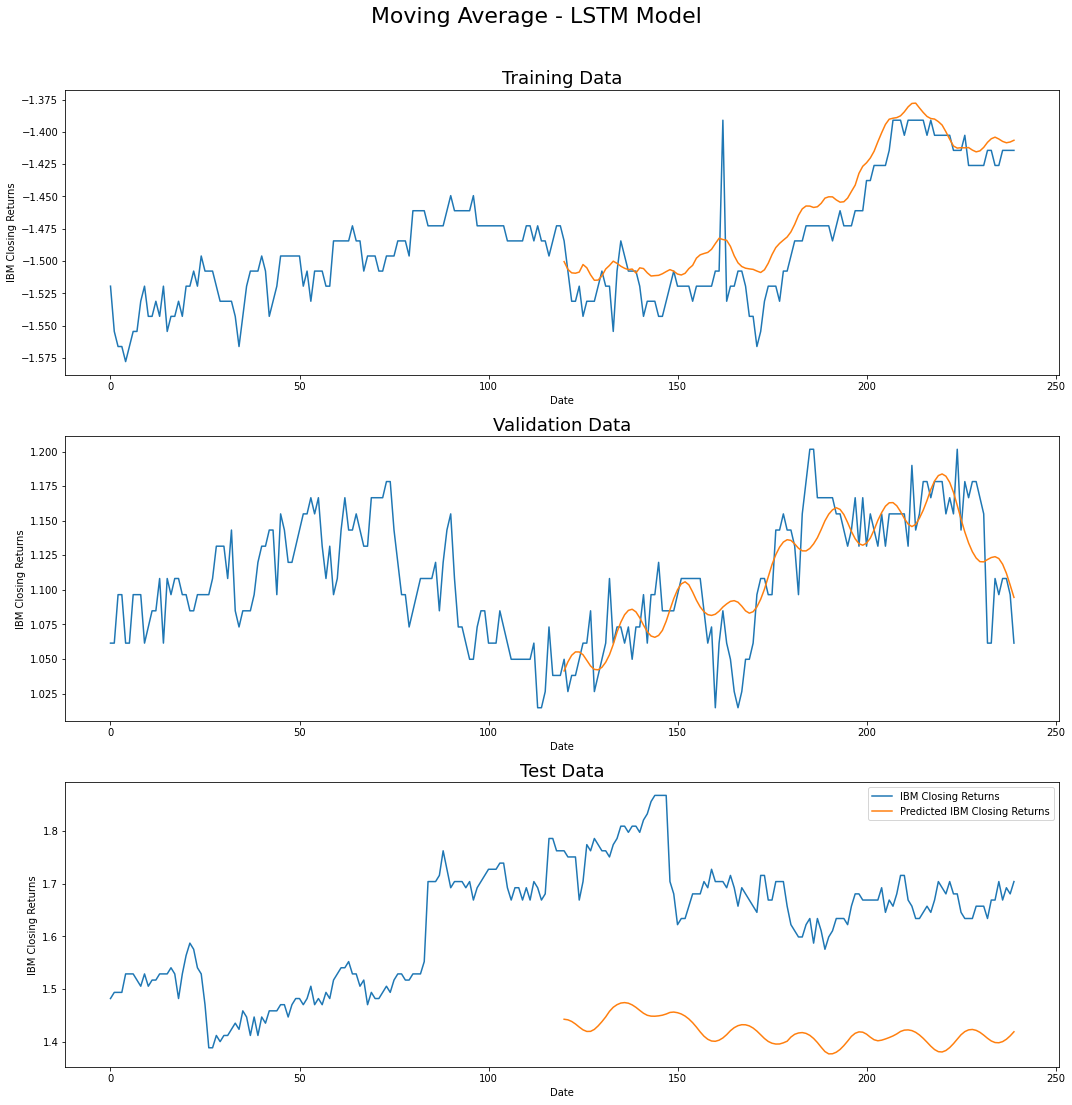

In [43]:
'''Display results'''

fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Moving Average - LSTM Model", fontsize=22)
st.set_y(1.02)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax11.plot(np.arange(seq_len-8, int(2*(seq_len-8))), train_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('IBM Closing Returns')

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len-8, int(2*(seq_len-8))),val_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('IBM Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len-8, int(2*(seq_len-8))),test_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('IBM Closing Returns')
 
plt.tight_layout()
plt.legend(loc='best')

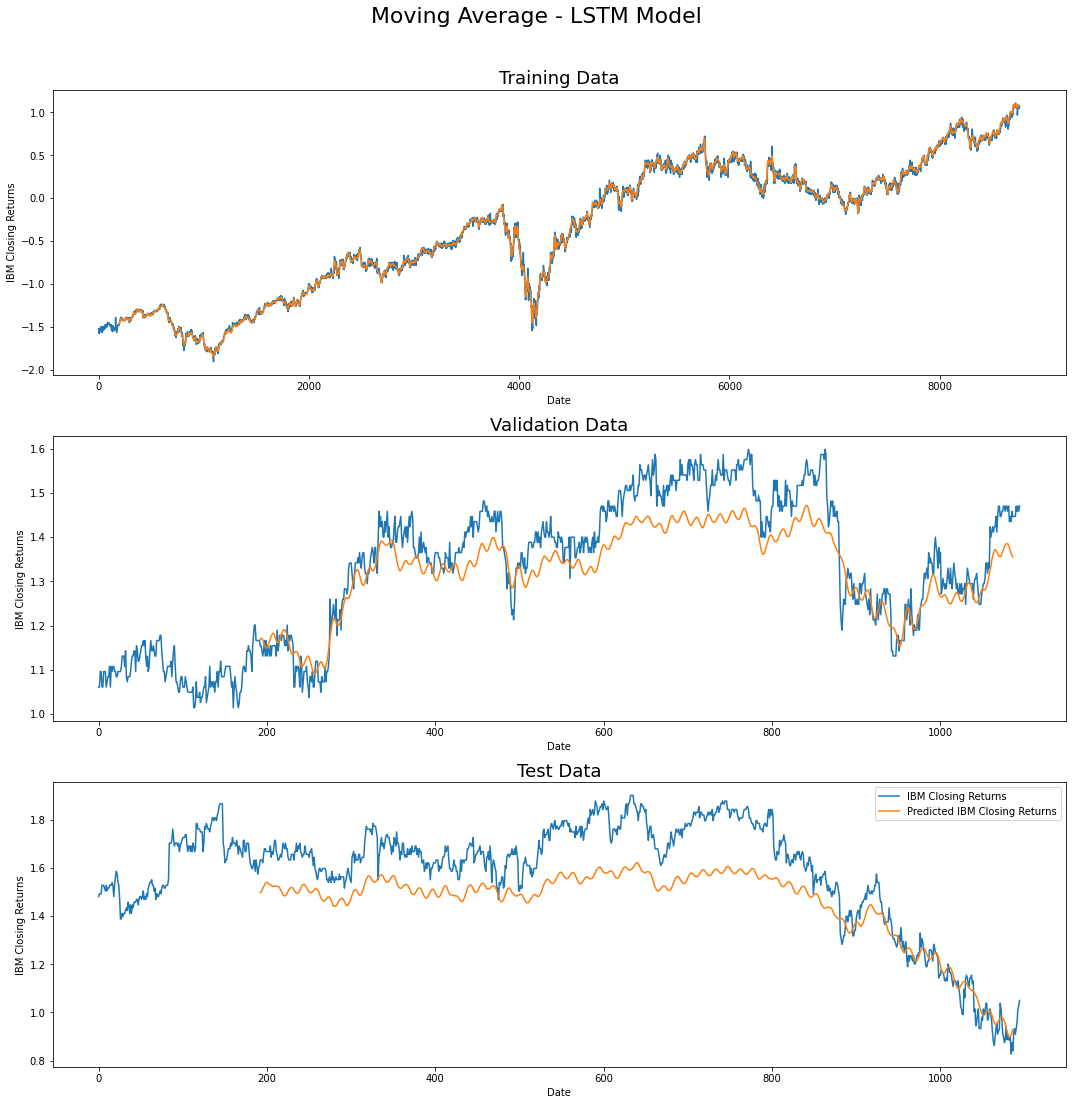

In [17]:
'''Display results'''

fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Moving Average - LSTM Model", fontsize=22)
st.set_y(1.02)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='IBM Closing Returns')
ax11.plot(np.arange(seq_len-8, train_pred.shape[0]+seq_len-8),train_pred, label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('IBM Closing Returns')

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len-8, val_pred.shape[0]+seq_len-8),val_pred, label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('IBM Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len-8, test_pred.shape[0]+seq_len-8), test_pred, label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('IBM Closing Returns')
 
plt.tight_layout()
plt.legend(loc='best')

In [45]:
model.fit(X_train, y_train,
              batch_size=1024,
              epochs=100,
              validation_data=(X_val, y_val),)  

Epoch 1/100
9/9 [==============================] - 12s 1s/step - loss: 8.4929e-04 - val_loss: 0.0131
Epoch 2/100
9/9 [==============================] - 13s 1s/step - loss: 8.7185e-04 - val_loss: 0.0059
Epoch 3/100
9/9 [==============================] - 12s 1s/step - loss: 8.2395e-04 - val_loss: 0.0075
Epoch 4/100
9/9 [==============================] - 11s 1s/step - loss: 8.1847e-04 - val_loss: 0.0130
Epoch 5/100
9/9 [==============================] - 11s 1s/step - loss: 8.0831e-04 - val_loss: 0.0076
Epoch 6/100
9/9 [==============================] - 13s 1s/step - loss: 7.7818e-04 - val_loss: 0.0138
Epoch 7/100
9/9 [==============================] - 12s 1s/step - loss: 8.4096e-04 - val_loss: 0.0079
Epoch 8/100
9/9 [==============================] - 11s 1s/step - loss: 7.5355e-04 - val_loss: 0.0079
Epoch 9/100
9/9 [==============================] - 12s 1s/step - loss: 7.7484e-04 - val_loss: 0.0115
Epoch 10/100
9/9 [==============================] - 12s 1s/step - loss: 7.7824e-04 - val_lo

Epoch 81/100
9/9 [==============================] - 8s 877ms/step - loss: 6.0914e-04 - val_loss: 0.0072
Epoch 82/100
9/9 [==============================] - 8s 848ms/step - loss: 6.1969e-04 - val_loss: 0.0059
Epoch 83/100
9/9 [==============================] - 8s 851ms/step - loss: 5.8603e-04 - val_loss: 0.0050
Epoch 84/100
9/9 [==============================] - 8s 844ms/step - loss: 5.7468e-04 - val_loss: 0.0058
Epoch 85/100
9/9 [==============================] - 8s 835ms/step - loss: 5.6688e-04 - val_loss: 0.0066
Epoch 86/100
9/9 [==============================] - 8s 838ms/step - loss: 5.9741e-04 - val_loss: 0.0059
Epoch 87/100
9/9 [==============================] - 8s 841ms/step - loss: 6.4875e-04 - val_loss: 0.0051
Epoch 88/100
9/9 [==============================] - 8s 849ms/step - loss: 6.3207e-04 - val_loss: 0.0047
Epoch 89/100
9/9 [==============================] - 8s 838ms/step - loss: 7.1556e-04 - val_loss: 0.0059
Epoch 90/100
9/9 [==============================] - 8s 842ms/ste

In [48]:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

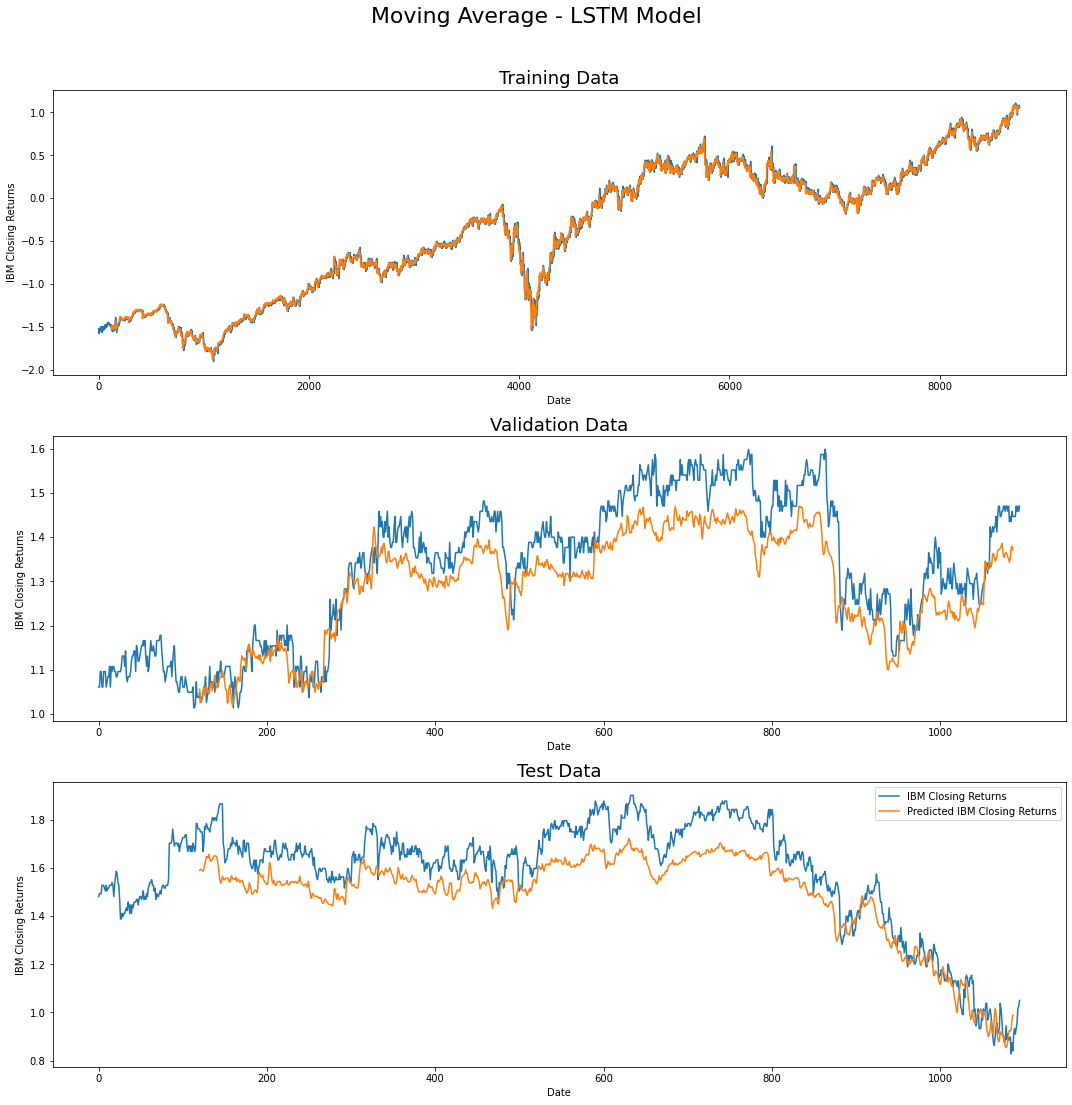

In [49]:
'''Display results'''

fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Moving Average - LSTM Model", fontsize=22)
st.set_y(1.02)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='IBM Closing Returns')
ax11.plot(np.arange(seq_len-8, train_pred.shape[0]+seq_len-8),train_pred, label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('IBM Closing Returns')

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len-8, val_pred.shape[0]+seq_len-8),val_pred, label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('IBM Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len-8, test_pred.shape[0]+seq_len-8), test_pred, label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('IBM Closing Returns')
 
plt.tight_layout()
plt.legend(loc='best')

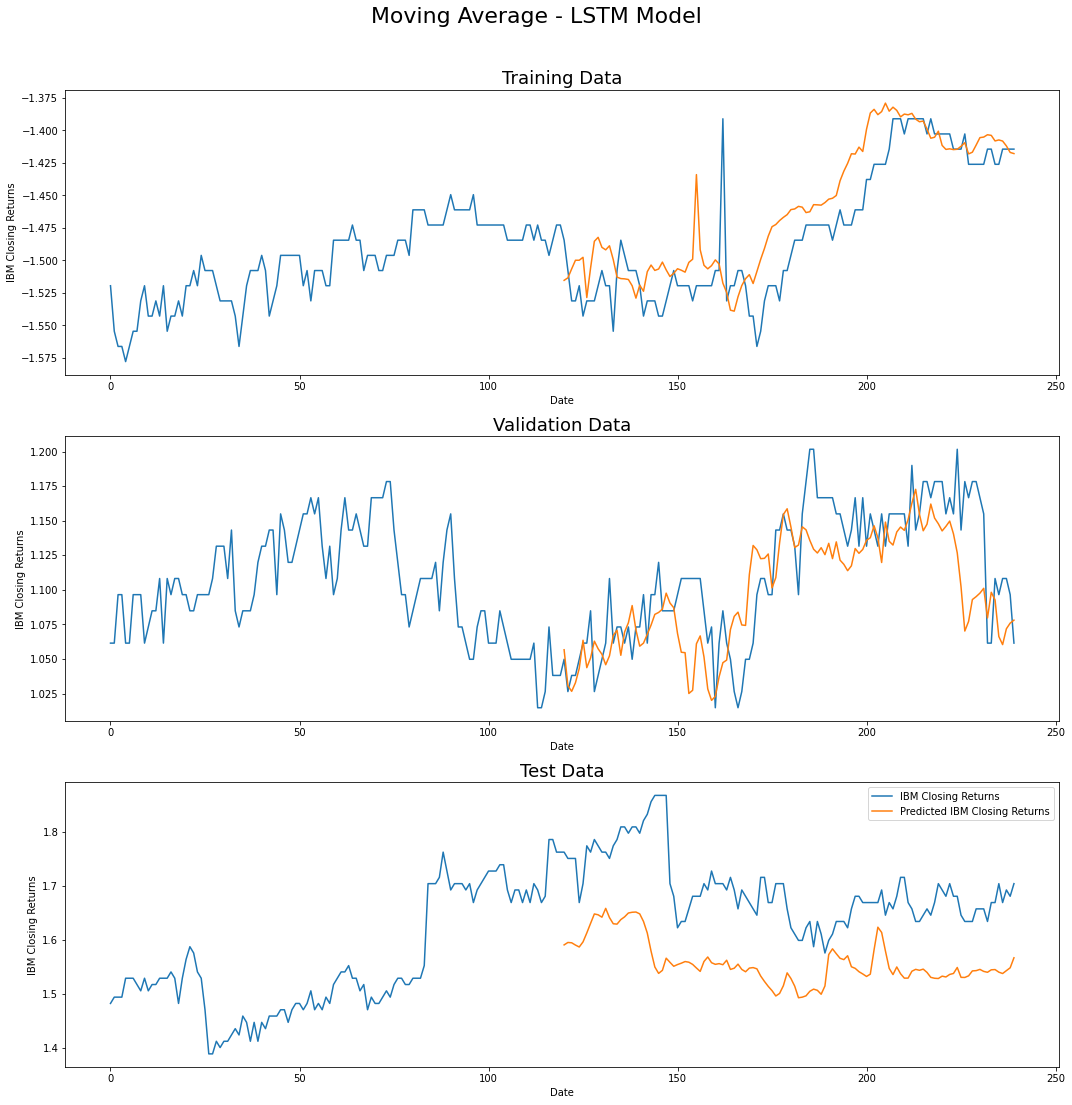

In [50]:
'''Display results'''

fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Moving Average - LSTM Model", fontsize=22)
st.set_y(1.02)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax11.plot(np.arange(seq_len-8, int(2*(seq_len-8))), train_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('IBM Closing Returns')

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len-8, int(2*(seq_len-8))),val_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('IBM Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len-8, int(2*(seq_len-8))),test_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('IBM Closing Returns')
 
plt.tight_layout()
plt.legend(loc='best')